#### 1. `rolling` とは何か？

* **定義**: データに「窓」（ウィンドウ）を設定し、その窓をスライドさせながら窓内のデータに対して統計計算（例：平均、合計、標準偏差など）を行う手法。
* **別名**: 「移動窓」や「ローリングウィンドウ」とも呼ばれる。
* **主な目的**:
    * **データの平滑化**: 時系列データにおける日ごとの大きなばらつきを軽減し、見やすくする。
    * **傾向の把握**: データ全体の傾向（トレンド）が視覚的に捉えやすくなり、分析がしやすくなる。
    

#### 2. `rolling` の計算メカニズム

* **窓幅 `w`**: 計算に含めるデータポイントの数、または時間的な期間。
* **計算方法の基本**:
    1.  まず、指定された窓幅で最初のデータグループ（窓）を定義します。
    2.  その窓内のデータに対して、指定された計算（例：平均）を実行します。
    3.  窓を1つ（または指定されたステップ）ずらして、次のデータグループを定義し、再度計算します。
    4.  このプロセスをデータセットの終わりまで繰り返します。
* **計算結果の配置**: 計算された値は通常、窓の**末尾のデータ位置**に割り当てられます。
* **初期値の欠損 (NaN)**:
    * 最初の `(w-1)` 個のデータポイントは、窓を満たすのに十分な先行データがないため、`NaN`（Not a Number、欠損値）になります。
    * 例: 窓幅が5の場合、最初の4個のデータは`NaN`となります。
    * `min_periods=1`オプションを使用すると、窓が完全に満たされていなくても計算を実行し、`NaN`の数を減らすことができます。


#### 3. `rolling(数)` と `rolling(時間幅)` の違い 

`rolling()`関数は、窓の定義方法として「データポイントの数」または「時間的な期間」のいずれかを指定できます。この違いは、特に日付データに不連続性がある場合に重要です。

| 種類                 | `rolling(数)` (例: `rolling(5)`)          | `rolling(時間幅)` (例: `rolling('5D')`)        |
| :------------------- | :---------------------------------------- | :--------------------------------------------- |
| **窓の定義** | **データポイントの数**（例: 直前の5個のデータ） | **時間的な期間**（例: 直近の5日間）             |
| **考慮するデータ** | 単純に**直前のN個のデータエントリ**を処理します。データの日付の間にギャップがあっても、N個のデータが取られます。 | 指定された**期間内に含まれる全てのデータ**を処理します。期間内のデータ数がN個に満たなくても、その期間内のデータで計算します。 |
| **日付の不連続性** | **無視**される。日付のギャップは計算に影響しません。 | **考慮される**。ギャップがあっても時間窓は一定です。期間内のデータのみが対象です。 |
| **計算例 (4/05のデータ `1` の`rolling('5D')`)** | データ番号3（4/05）の時点から遡って5つのデータ (4/05, 4/07, 4/08, 4/10, etc.) を使います。 | 4/05を終端とする5日間 (4/01-4/05) に含まれるデータ (4/01の3, 4/02の5, 4/04の4, 4/05の1) を使います。 |
| **用途** | データポイント数が均等な場合や、時間に関わらずN個の連続データを見たい場合。 | 日付に欠損があるデータや、時間的な連続性で分析したい場合。特に時間的な期間で分析する際に柔軟です。 |
| **月次平均の注意** | -                                         | 「1M」のように可変の日数を指定するとエラーになりやすいです。**「30D」のように固定の日数**で指定するのが安全です。|

#### 4. pandas でのコード例 (DataFrame `df` を使用)

* **N個の移動平均**:
    ```python
    df_rolling_N = df.rolling(N).mean()
    ```
    *例:* `df.rolling(7).mean()` (7データポイントの移動平均)
* **時間幅の移動平均**:
    ```python
    df_rolling_time = df.rolling('時間幅').mean()
    ```
    *例:* `df.rolling('7D').mean()` (7日間の移動平均)
* **欠損値の扱いの変更**:
    ```python
    df_rolling_min_periods = df.rolling(window=5, min_periods=1).mean()
    ```
    *窓が完全に満たされていなくても計算を実行し、最初のNaNの数を減らします。*

#### 5. 移動平均のグラフ化 (可視化)

* 移動平均は、元のデータと合わせてグラフ化することで、その平滑化効果とトレンドの可視化効果を明確に確認できます。
* グラフ作成のポイント（`matplotlib.pyplot`を使用する場合など）:
    * **X軸データ (日付)**: 通常、DataFrameの`index`を使用します。
        ```python
        plt.plot(df.index, df['列名'], label='元のデータ')
        ```
    * **凡例の表示**: 各プロットに`label`引数でラベル名を付け、最後に`plt.legend()`を呼び出すことで、グラフ内に凡例が表示されます。
        ```python
        plt.plot(df_rolling.index, df_rolling['列名'], label='移動平均')
        plt.legend()
        plt.show()
        ```
    * `plt.xlabel()`でX軸ラベル、`plt.ylabel()`でY軸ラベルを設定できます。

#### 6. 具体例

##### (1) データポイント数でrolling（例: rolling(3)）

| 日付       | 値 |
|:----------:|:--:|
| 2024-06-01 | 10 |
| 2024-06-02 | 20 |
| 2024-06-03 | 30 |
| 2024-06-04 | 40 |
| 2024-06-05 | 50 |

- `df.rolling(3).mean()` の結果

| 日付       | 値 | 3日移動平均 |
|:----------:|:--:|:-----------:|
| 2024-06-01 | 10 |    NaN      |
| 2024-06-02 | 20 |    NaN      |
| 2024-06-03 | 30 |    20.0     | ← (10+20+30)/3
| 2024-06-04 | 40 |    30.0     | ← (20+30+40)/3
| 2024-06-05 | 50 |    40.0     | ← (30+40+50)/3

##### (2) 時間幅でrolling（例: rolling('3D')）

| 日付       | 値 |
|:----------:|:--:|
| 2024-06-01 | 10 |
| 2024-06-02 | 20 |
| 2024-06-04 | 40 |
| 2024-06-05 | 50 |

- `df.rolling('3D').mean()` の結果

| 日付       | 値 | 3日間移動平均 |
|:----------:|:--:|:-------------:|
| 2024-06-01 | 10 |     10.0      | ← 1日だけ
| 2024-06-02 | 20 |     15.0      | ← (10+20)/2（6/1～6/2の2日間）
| 2024-06-04 | 40 |     40.0      | ← 6/2～6/4の間にデータがないので40のみ
| 2024-06-05 | 50 |     45.0      | ← (40+50)/2（6/4～6/5の2日間）

> ※rolling('3D')は「直近3日間にある全データ」を対象にするため、日付が飛んでいると平均に含まれるデータ数が変わります。




-

![スクリーンショット 2025-05-21 115436.png](<attachment:スクリーンショット 2025-05-21 115436.png>)
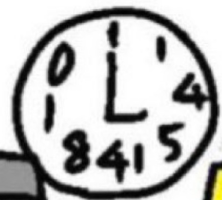